<a href="https://colab.research.google.com/github/delphi12/VirtualAssistant_Assignment2/blob/main/Algorithms/Algorithm1_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importing necessary packages
import pandas as pd
from sklearn import tree
from nltk.metrics import edit_distance
from sklearn.metrics import classification_report, f1_score

In [12]:
#reading the preprocessed train, dev and test data
df_train = pd.read_csv('/train_01.csv')
df_dev = pd.read_csv('/dev_01.csv')
df_test = pd.read_csv('/test_01.csv')

In [13]:
def getEditDistance(dataframe, size):
  distance = []
  for i in range(size):
    sent1 = str(dataframe['Sent_1'][i])
    sent2 = str(dataframe['Sent_2'][i])
    #print(i, edit_distance(sent1, sent2), sent1, sent2, sep="*")
    distance.append(edit_distance(sent1, sent2))
  return distance

In [14]:
def removeNanValueRows(dataframe):
  if(dataframe.isna().sum().sum()) > 0:
    dataframe = dataframe.dropna()
  return dataframe

# **Train Dataset: Edit Distance Calculation**



In [15]:
print(len(df_train))
print(len(df_dev))
print(len(df_test))

11530
4142
838


In [16]:
size = 800
distance = getEditDistance(df_train, size)

# train data for model training
train_data = pd.concat([df_train['Topic_Id'], pd.DataFrame(distance),df_train['Label']],axis=1)
train_data.columns = ['Topic_Id','distance','Label']
print(len(train_data))

#Removing Nan value Rows
train_data = removeNanValueRows(train_data)
print(len(train_data))

# write the train data to csv file
train_data.to_csv("/train_data_alg1.csv",index=0)

11530
800


# **Dev Dataset: Edit Distance Calculation**


In [17]:
size = 100
edit_dis_dev = getEditDistance(df_dev, size)

# dev data for model training
dev_data = pd.concat([df_dev['Topic_Id'],pd.DataFrame(edit_dis_dev),df_dev['Label']],axis=1)
dev_data.columns = ['Topic_Id','distance','Label']
print(len(dev_data))

#Removing Nan value Rows
dev_data = removeNanValueRows(dev_data)
print(len(dev_data))

# write the dev data to csv file
dev_data.to_csv("/dev_data_alg1.csv",index=0)

4142
100


## **Test Dataset: Edit Distance Calculation**

In [18]:
size = 100
edit_dis_test = getEditDistance(df_test, size)

# test data for model training
test_data = pd.concat([df_test['Topic_Id'],pd.DataFrame(edit_dis_test),df_test['Label']],axis=1)
test_data.columns = ['Topic_Id','distance','Label']
print(len(test_data))

#Removing Nan value Rows
test_data = removeNanValueRows(test_data)
print(len(test_data))

# write the test data to csv file
test_data.to_csv("/test_data_alg1.csv",index=0)

838
100


# **Baseline Algorithm**

In [19]:
# train data_X, train_data_y
train_data_y = train_data['Label']
train_data_X = train_data.copy()
train_data_X.drop(['Label'],axis=1,inplace=True)

In [20]:
# dev_data_X, dev_data_y
dev_data_y = dev_data['Label']
dev_data_X = dev_data.copy()
dev_data_X.drop(['Label'],axis=1,inplace=True)

In [21]:
# test_data_X, test_data_y
test_data_y = test_data['Label']
test_data_X = test_data.copy()
test_data_X.drop(['Label'], axis=1, inplace=True)

### **Train the model with DecisionTreeClassifier**

In [22]:
clf_tree = tree.DecisionTreeClassifier(criterion="entropy")
clf_tree = clf_tree.fit(train_data_X,train_data_y)
score_tree = clf_tree.score(dev_data_X, dev_data_y)
print("score_tree:",score_tree)

score_tree: 0.68


In [23]:
dev_y_pred = clf_tree.predict(dev_data_X)
dev_y_true = dev_data_y
f1 = f1_score(dev_y_true,dev_y_pred)
print("f1_score:",f1)

print(classification_report(dev_y_true,dev_y_pred))

f1_score: 0.15789473684210525
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        69
           1       0.43      0.10      0.16        31

    accuracy                           0.68       100
   macro avg       0.56      0.52      0.48       100
weighted avg       0.62      0.68      0.60       100



In [24]:
# test
test_y_pred = clf_tree.predict(test_data_X)
test_y_true = test_data_y
f1_test = f1_score(test_y_true,test_y_pred)
print("f1_score_test:",f1_test)
print("\ntest:")
print(classification_report(test_y_true, test_y_pred))

f1_score_test: 0.07407407407407408

test:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        83
           1       0.10      0.06      0.07        17

    accuracy                           0.75       100
   macro avg       0.46      0.48      0.46       100
weighted avg       0.70      0.75      0.72       100



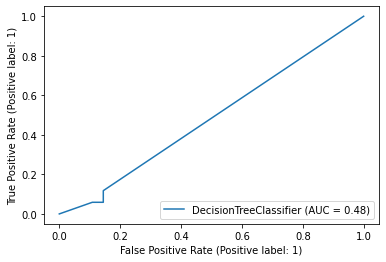

In [26]:
from sklearn.metrics import RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(clf_tree, test_data_X, test_data_y)